# Статистики за корона вирусот во Македонија

In [ ]:
import pandas as pd
# import nbinteract as nbi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact

import statistics_methods

%matplotlib inline

In [ ]:
all_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

all_data.head()

In [ ]:
def get_data_for_country(data, name):
    res = statistics_methods.get_data_by_country_name(data=data, country_column='Country/Region', country_name=name)
    res = statistics_methods.convert_data_in_day_count_larger_than_zero_format(data=res, id_vars=res.columns[1 : 4], value_vars=res.columns[4:], var_name='date', value_name='count')
    return res

def get_data_by_country_name(data, country_column, country_name):
    return data.loc[data[country_column] == country_name]


def convert_data_in_day_count_larger_than_zero_format(data, id_vars, value_vars, var_name, value_name):
    converted = pd.melt(data, id_vars=id_vars, value_vars=value_vars, var_name=var_name, value_name=value_name)
    converted = converted.loc[converted[value_name] > 0].reset_index(drop=True)
    converted.insert(0, 'artificial_day', range(1, 1 + len(converted)))
    return converted.loc[converted[value_name] > 0].reset_index(drop=True)


In [136]:
def get_data_for_countries(data, countries):
    data = [get_data_for_country(data, country) for country in countries]
    lengths = [len(country_data) for country_data in data]
    comparable_days_count = max(lengths)
#     interesting_data = pd.concat([country_data.iloc[:comparable_days_count] for country_data in data])
    return data, comparable_days_count

def draw_line_plot(data, day_range):
    plt.close('all')
    figure = plt.figure(num='figure', figsize=(15,10))
    from_day = day_range[0]
    to_day = day_range[1]
    print(from_day)
    interesting_data = pd.concat([country_data.loc[(country_data['artificial_day'] >= from_day) & 
                                                   (country_data['artificial_day'] <= to_day)] 
                                  for country_data in data])
    line_plot = sns.lineplot(x="artificial_day", y="count", hue='Country/Region', data=interesting_data, ax=plt.axes())

    line_plot.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    line_plot.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    return line_plot


IntRangeSlider(value=(1, 10), continuous_update=False, description='Избери за кои денови:', max=45, min=1)

1


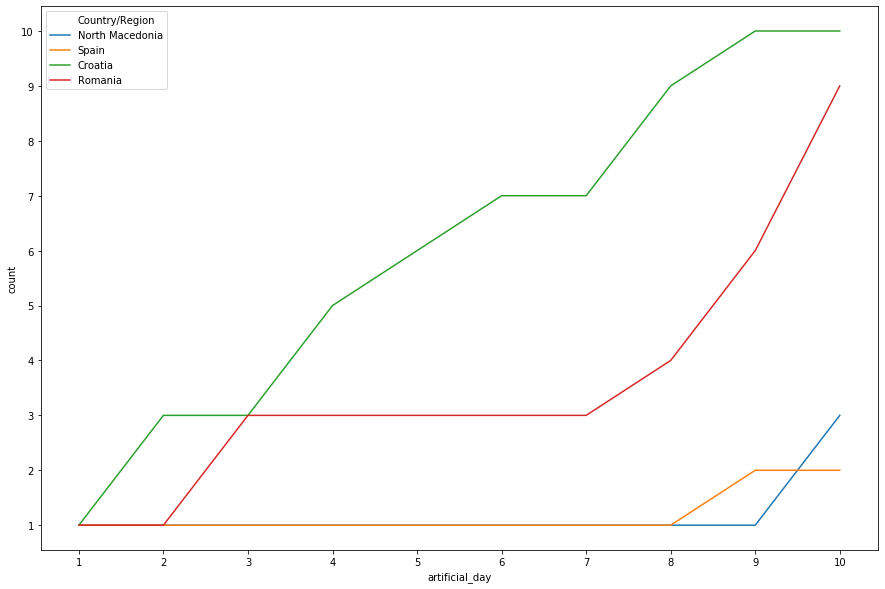

1


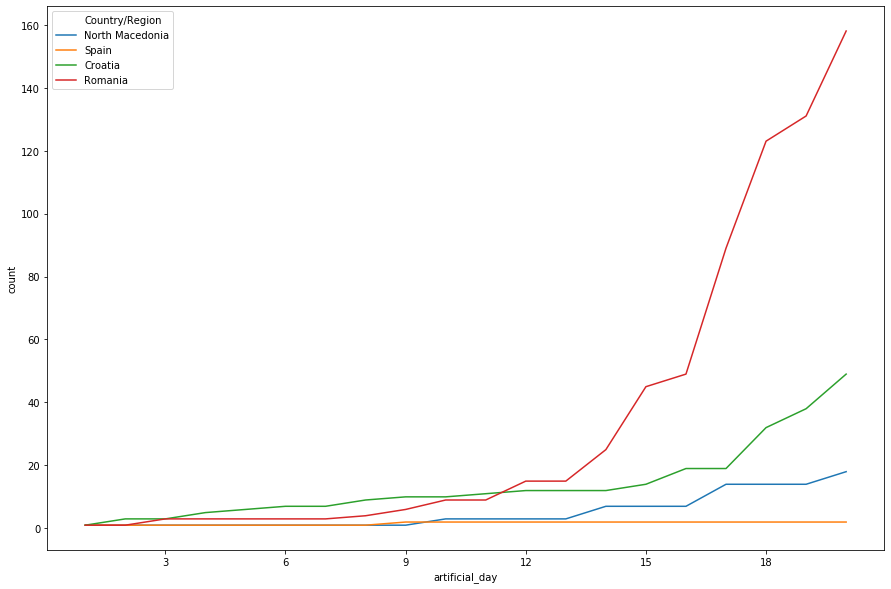

In [137]:
interesting_data, max_days = get_data_for_countries(all_data, countries=['North Macedonia', 'Spain', 'Croatia', 'Romania'])



day_range_chooser = widgets.IntRangeSlider(
    value=[1, 10],
    min=1,
    max=max_days,
    step=1,
    description='Избери за кои денови:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

display(day_range_chooser)

def on_values_change(change):
    draw_line_plot(interesting_data, change['new'])


draw_line_plot(interesting_data, (1, 10))
day_range_chooser.observe(on_values_change, names='value')



# interact(draw_line_plot, day_range_chooser)
# line_plot.set_xticklabels(line_plot.get_xticklabels(), rotation=45)
# line_plot.xaxis.set_major_locator(ticker.MultipleLocator(2))